In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from mpl_toolkits import mplot3d
 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [5]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [6]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])

In [7]:
n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 5 # size of the hidden layer, # neurons, this is just for the moment to have some example

# Question 1. (Full minimization)

### MLP network

In [8]:
def initialize_parameters(N=5,n=2, n_y=1):
    """
    Argument:
    n -- size of the input layer
    N -- size of the hidden layer
    p -- size of the sample
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (N, n)
                    b1 -- bias vector of shape (N, 1)
                    V -- weight matrix of shape (n_y, N)
    """
        
    W1 = np.random.randn(N,n)# * 0.01

    b1 = np.zeros(shape=(N, 1))
    V = np.random.randn(n_y,N)# * 0.01
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "V": V}
    
    return parameters

In [9]:
initialize_parameters()

{'W1': array([[-0.38573592, -1.15613982],
        [-0.02990526,  0.35739532],
        [ 0.67875584,  0.00505203],
        [ 0.05834091, -1.15764416],
        [ 2.15146316, -1.58145223]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]), 'V': array([[-0.68771881,  1.08158863, -0.82450169, -0.25255125, -2.82752072]])}

In [10]:
W1 = np.random.randn(N,n)# * 0.01
b1 = np.random.randn(N,1)# * 0.01
V = np.random.randn(n_y,N)# * 0.01

In [11]:
X=X_train
W=W1
V=V
bias=b1
true=Y_train

ro=10**-5 #10-5 unti, 10-3
sigma=1
P=P



a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)

def second_norm(omega):
    return np.linalg.norm(omega)**2   #,2)#**2

def tanh(t,sigma=1):
    return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)
def activation_f(W,X,bias):
        
    return tanh(W.dot(X)-bias,sigma)

def predict(omega,X):
    '''
 
    '''
  

    
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    
    predicted_values=V.dot(activation_f(W,X,bias))
    return predicted_values#, W,bias




def reg_tr_error(omega,functionArgs):
    '''
    P - number of samples
    predicted - f(x^p)
    true - y^p
    ro - the regularization parameter
    omega - (v,w,b) - inp, inp, bias
    '''  
    X=functionArgs[0]
    true=functionArgs[1]
    
    predicted=predict(omega,X)
  
    
    err=predicted-true.T
    err_all=err.dot(err.T)
    
     #error=(np.sum((np.sum((predicted.T-true)**2, axis=1)))/(2*P))+ro*second_norm(omega)
###    # (np.sum((predicted.T-true)**2))/(2*P)+ro*second_norm(omega)

    P=X.shape[1]
    return ((err_all)/(2*P)+ro*second_norm(omega)).item(0)

In [12]:
reg_tr_error(omega.flatten(),[X_train,Y_train])

6.240099666154882

In [13]:
res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train])
res

      fun: 8.27366049705492e-05
 hess_inv: array([[ 1.74145233e+03, -1.83395179e+03,  1.17319548e+03,
        -1.34885671e+03, -4.04017189e+02, -2.50860759e+02,
        -4.98158938e+02,  5.54271449e+02, -1.39034818e+03,
        -3.36658549e+02, -2.27225169e+01,  3.03174734e+02,
        -8.38516196e+02, -9.79369382e+02, -6.58027268e+02,
         6.25379223e+02, -1.40729940e+02, -2.98517539e+02,
        -5.91025056e+02,  1.31767186e+03],
       [-1.83395179e+03,  2.36619171e+03, -1.93437553e+03,
         1.13523125e+03, -2.91858273e+02, -8.24164069e-01,
         8.87916403e+02, -4.29063675e+02,  1.54967862e+03,
        -4.78313041e+01,  3.13779768e+02, -5.56497649e+02,
         9.50584100e+02,  5.85574902e+02,  5.52581971e+02,
        -4.47763165e+02, -1.18199802e+02,  6.96342262e+02,
         9.17940095e+02, -1.48016351e+03],
       [ 1.17319548e+03, -1.93437553e+03,  7.12892484e+03,
         2.23106013e+03,  2.62292079e+03,  6.90328071e+02,
        -4.96188545e+02,  5.70241684e+02, -4.

In [14]:
print(reg_tr_error(res['x'].flatten(),[X_train,Y_train]))
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))

8.27366049705492e-05
0.4754778897066497
1.0472377423031909


In [15]:
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))

print(reg_tr_error(res['x'].flatten(),[X_test,Y_test])*X_test.shape[1])

1.0472377423031909
47.12569840364359


In [16]:
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))

print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate])*X_validate.shape[1])

0.4754778897066497
21.396505036799237


In [17]:
#def plotApproximation():

$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [42]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed

In [43]:
def rmse(true,predicted):
    return np.sqrt(np.sum((true-predicted)**2))

K=5   # SO 4 folds for training 1-validation for testing; they switch every time
cv_data=np.concatenate((data_train,data_validate))
np.random.shuffle(cv_data)
indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
folds=[]




X=X_train
W=W1
V=V
bias=b1
true=Y_train

ro=10**-5 #10-5 unti, 10-3
sigma=1
P=cv_data.shape[0]



val_err_dict={}


data=cv_data.copy()
#CHOSEN OMEGA?

omega=res['x']
for i in range(len(indices)):
    cv_data=data
    if i<4:
        l=[i for i in range(indices[i],indices[i+1])]
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:indices[i+1],:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        
        
        X_train = np.transpose(np.matrix(train_cv)[:,0:2])
        Y_train = np.transpose(np.matrix(train_cv)[:,2:])
        X_validate = np.transpose(validate_cv[:,0:2])
        Y_validate = np.transpose(validate_cv[:,2:])

        
        val_err_dict[i]=rmse(Y_validate,predict(omega.flatten(),X_validate))
        
    #    reg_tr_error(omega.flatten(),X_test)
    else:
        #for the last element
        l=list([i for i in range(indices[i],255)])
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:,:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        val_err_dict[i]=rmse(Y_validate,predict(omega,X_validate))


In [44]:
#average rmse
sum(val_err_dict.values())/len(val_err_dict)

16.585474857666778

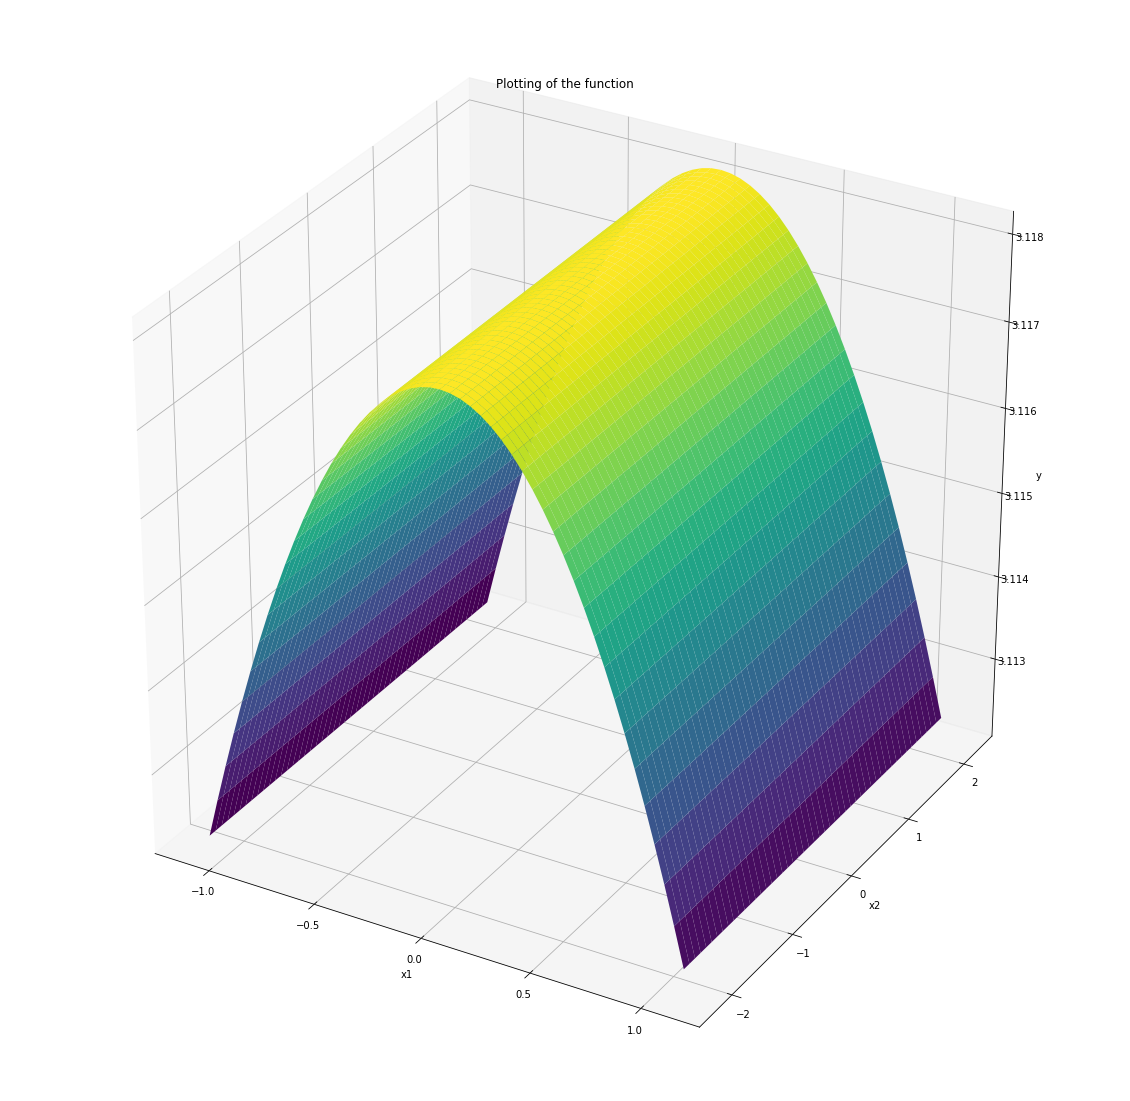

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def saddle(X):
    
    omega=res['x']
    
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    def tanh(t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)
    def activation_f(W,X,bias):
        
        return tanh(W.dot(X)-bias,sigma)
  
    predicted_values=V.dot(activation_f(W,X,bias))
    return predicted_values


def plotting( title='Plotting of the function'): #if you do not provide a title, 'Plotting...' will be used
    #create the object
    fig = plt.figure(figsize=(20,20))
    ax = plt.axes(projection='3d')
    #create the grid
    sample=50
#    x = np.linspace(-1.1, 1.1, sample) #create 50 points between [-5,5] evenly spaced  

#    y = np.linspace(-2.2, 2.2, sample)
 
    X = X_train[0]
    Y = X_train[1]
    sample = X.shape[0]

    #x=np.random.randn(sample,1)
    #y=np.random.randn(sample,1)

 #   XY=np.concatenate((X,Y)).reshape(2,sample).T
    sample=50
    x = np.linspace(-1.1, 1.1, sample) #create 50 points between [-5,5] evenly spaced  

    y = np.linspace(-2.2, 2.2, sample)

#    XY=X_train.T
    X, Y = np.meshgrid(x,y) #create the grid for the plot
    XY=np.concatenate((x,y)).reshape(2,sample).T
    Z = saddle(XY.T) #evaluate the function (note that X,Y,Z are matrix)
 
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
#    ax.set_zlim(-2,6)

    ax.set_title(title)
 ##   plt.xlim(-1,1)
 ##   plt.ylim(-2,2)
    plt.grid()
    plt.show()

plotting()

In [48]:
res['x']

array([ 1.12703396e+00, -6.08236795e-01, -1.32537350e+00,  1.32958963e+00,
       -6.40736666e-03, -6.99629486e-03, -3.63167114e-02,  2.04288247e-03,
       -4.06506573e-02, -7.48659163e-03, -1.39159253e-02, -1.21467679e-03,
       -1.44116541e-02, -1.10829188e-01, -1.62102446e-03, -9.07431460e-01,
        5.49483989e-01,  9.21541205e-01, -1.04869306e+00,  1.14152906e-01])



all below niente

In [ ]:
X=X_train
n,m=X.shape
w=np.random.randn(N,n) * 0.01

#pred
#y=
#ro=
def gradient(X,w,pred,y,ro):
    for iter in range(100):
           pred = X.dot(w.T)
           err = pred-y
           reg=2*(ro*w)
           reg[-1]=0
           grad = (err.T.dot(X) / P )+reg
           w = w - alpha * grad
           mean_square_error = err.T.dot(err) / P
           grad_norm = abs(grad).sum()
           if grad_norm<0.1 or mean_square_error<10: break
           print(iter, grad_norm, mean_square_error)
    return w

Def error function

In [ ]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 